To create a Random Forest model for predicting the growth of chicks based on your dataset, we’ll focus on predicting future body weights (e.g., predicted_bw8, predicted_bw12, predicted_bw16) using the features such as parental breeds, initial weight, daily gain values, and growth model parameters. Here’s a step-by-step guide:

# Step 1: Import Libraries and Load Data

In [ ]:
%pip install scikit-learn

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl (11.0 MB)


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

# Load the data
data = pd.read_csv('cross breeding dataset - please help me structure this properly___Chick_ID....csv')


# Step 2: Data Preparation
Handle Missing Values: Ensure there are no missing values in target columns (predicted_bw8, predicted_bw12, and predicted_bw16). If there are missing values (such as #NUM!), replace or drop them:

In [5]:
data = data.replace('#NUM!', pd.NA).dropna()


## Encode Categorical Variables: Convert Parent Breed Sire, Parent Breed Dam, and Cross Type to numerical values using encoding.

In [6]:
data = pd.get_dummies(data, columns=['Parent Breed Sire', 'Parent Breed Dam', 'Cross Type'], drop_first=True)


Separate Features and Target: Choose features to predict each target column. You may want to predict predicted_bw8, predicted_bw12, and predicted_bw16 separately.

Example for predicted_bw8:

In [22]:
# Trained for bodyweight at 8 weeks time and  for body weight at 12 weeks
# X = data.drop(columns=['Chick ID','bw4', 'bw8', 'bw12', 'bw16','dg4','dg8','dg12','dg16','A'])
# y = data['bw8']

# X = data.drop(columns=['Chick ID','bw4', 'bw8', 'bw12', 'bw16','dg4','dg8','dg12','dg16','A'])
# y = data['bw12']

X = data.drop(columns=['Chick ID','bw4', 'bw8', 'bw12', 'bw16','dg4','dg8','dg12','dg16','A'])
y = data['bw8']




# Step 3: Split Data into Training and Testing Sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 4: Initialize and Train the Random Forest Model


In [24]:
# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Step 5: Make Predictions and Evaluate


In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0131420807224098


In [26]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import numpy as np

# Assuming y_test and y_pred are defined
# y_test is the actual values, y_pred are the predicted values

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 0.007571428571441716
Root Mean Squared Error (RMSE): 0.11463891452037481
R-squared (R²): 0.9999869864511609


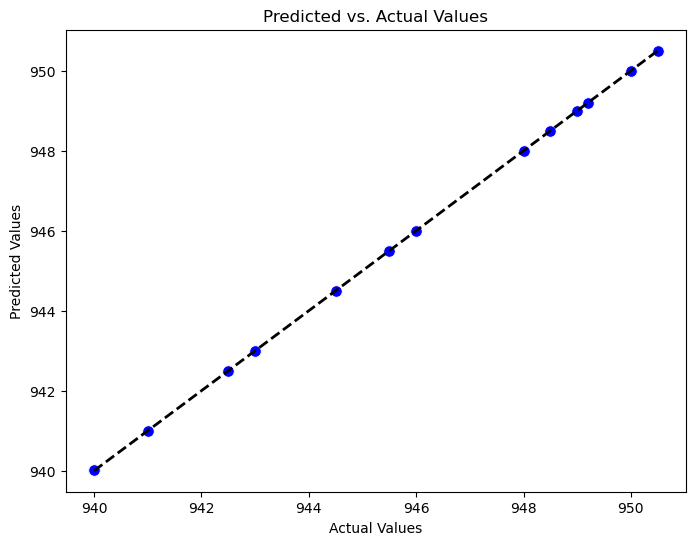

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test contains the actual values and y_pred contains the predicted values
# If not already generated, make predictions on the test set
y_pred = model.predict(X_test)

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor='w', s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()


In [27]:
import pandas as pd

# Define the column names based on your training data
column_names = [
    'Hatch Weight (g)', 'tip', 'k', 'predicted_bw8', 'predicted_bw12', 
    'predicted_bw16', 'Parent Breed Sire_MN', 'Parent Breed Dam_MN', 'Cross Type_Purebred'
]

# Create a DataFrame with the data and column names
data_df = pd.DataFrame([[36.2, 32, 0.063814, 367.87, 697.51, 938, True, False, False]], columns=column_names)



# Make the prediction
predicted_value = model.predict(data_df)

print("Predicted Value:", predicted_value)


Predicted Value: [347.97]


In [28]:
import joblib

# Replace 'model' with the name of your trained model
joblib.dump(model, 'random_forest_model_bw8.pkl')
print("Model saved successfully!")

print(np.__version__)
# Load the model
# loaded_model = joblib.load('random_forest_model.pkl')
# print("Model loaded successfully!")

# # Use the loaded model to make predictions
# predictions = loaded_model.predict(X_new)  # Replace X_new with your input data
# print(predictions)


Model saved successfully!
1.26.4


# Step 6: Repeat for Other Targets (Optional)
Repeat the above process for predicted_bw12 and predicted_bw16 by setting y to the respective target column.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

# Load data
data = pd.read_csv('path_to_your_file.csv')

# Handle missing values
data = data.replace('#NUM!', pd.NA).dropna()

# Encode categorical variables
data = pd.get_dummies(data, columns=['Parent Breed Sire', 'Parent Breed Dam', 'Cross Type'], drop_first=True)

# Features and target for predicted_bw8
X = data.drop(columns=['Chick ID', 'predicted_bw8', 'predicted_bw12', 'predicted_bw16'])
y = data['predicted_bw8']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error for predicted_bw8:", mse)


This code trains a Random Forest model to predict predicted_bw8. Adjust y for other targets (predicted_bw12, predicted_bw16) if you want to predict those values as well.